# I find this customer segmentation example online here: https://github.com/prateekmaj21/Mall-Customer-Segementation

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

This project is a part of Mall Customer Segmentation Data competition held on Kaggle.

The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
data=pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

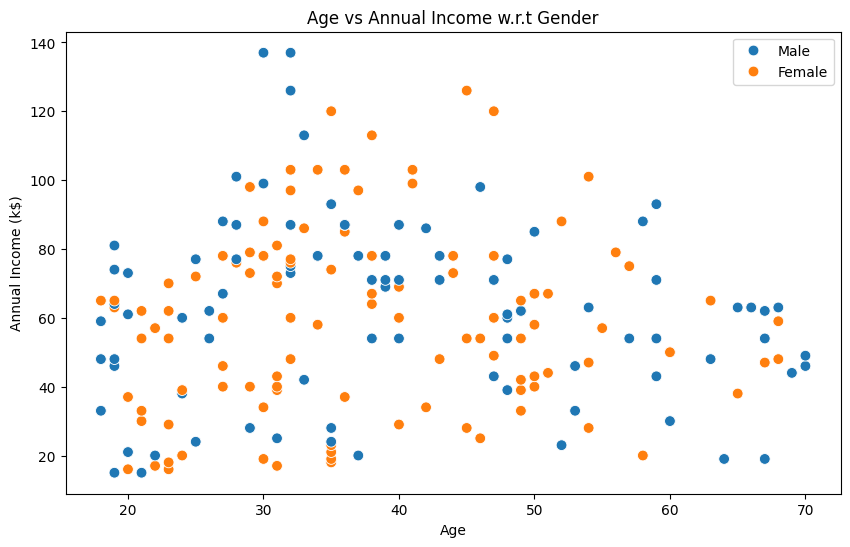

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

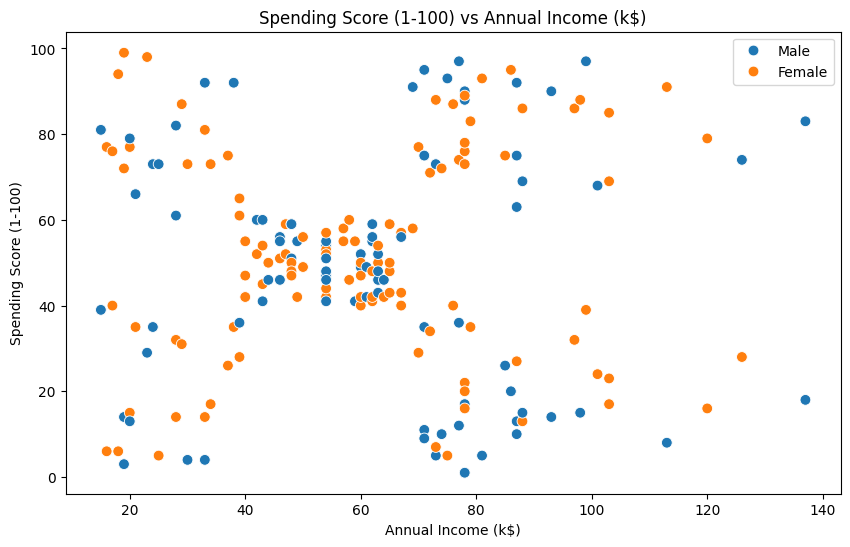

In [ ]:
## Figure out scatterplot of x = 'Annual Income (k$)',y = 'Spending Score (1-100)' and
## color it using Gender
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

In [ ]:
X = data [["Annual Income (k$)", "Spending Score (1-100)"]]

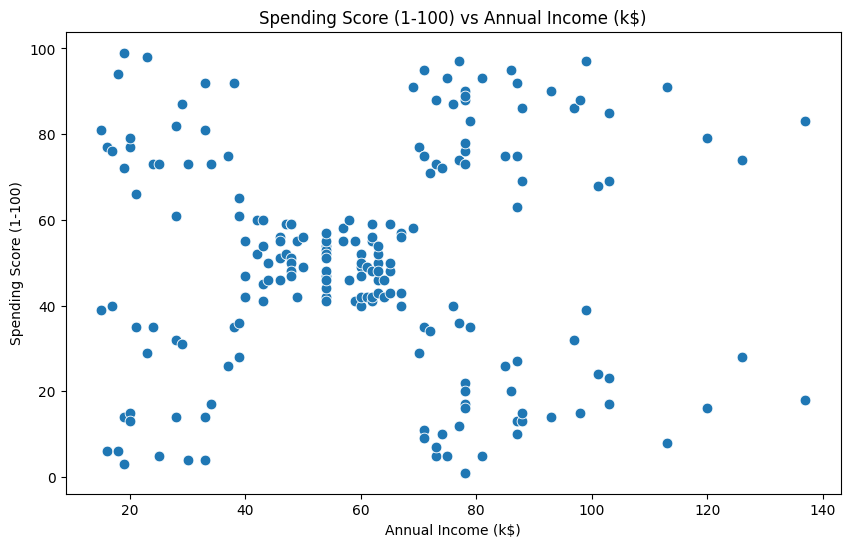

In [ ]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = data ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
#Importing KMeans from sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different
# values of k. Next, we choose the k for which WSS first starts to diminish.

# Inertia measures how well a dataset was clustered by K-Means. It is calculated by
# measuring the distance between each data point and its centroid, squaring this
# distance, and summing these squares across one cluster.

# A good model is one with low inertia AND a low number of clusters (K). However,
# this is a tradeoff because as K increases, inertia decreases.

# To find the optimal K for a dataset, use the Elbow method; find the point where
# the decrease in inertia begins to slow.

# Check this example when k=3 here:
# https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet#:~:text=Inertia%20measures%20how%20well%20a,these%20squares%20across%20one%20cluster.

wcss=[]
s_score =[]

for i in range(1,11):
  km = KMeans(n_clusters=i, n_init="auto")
  km.fit(X)
  if i>= 2:
    s= silhouette_score(X, km.labels_)
    s_score.append(s)
  wcss.append(km.inertia_)
    ## Steps
      ## Define KMeans object km with different number of clusters
      ## Fit the data X with km
      ## Get the inertia_ for each km
      ## And append it to wcss

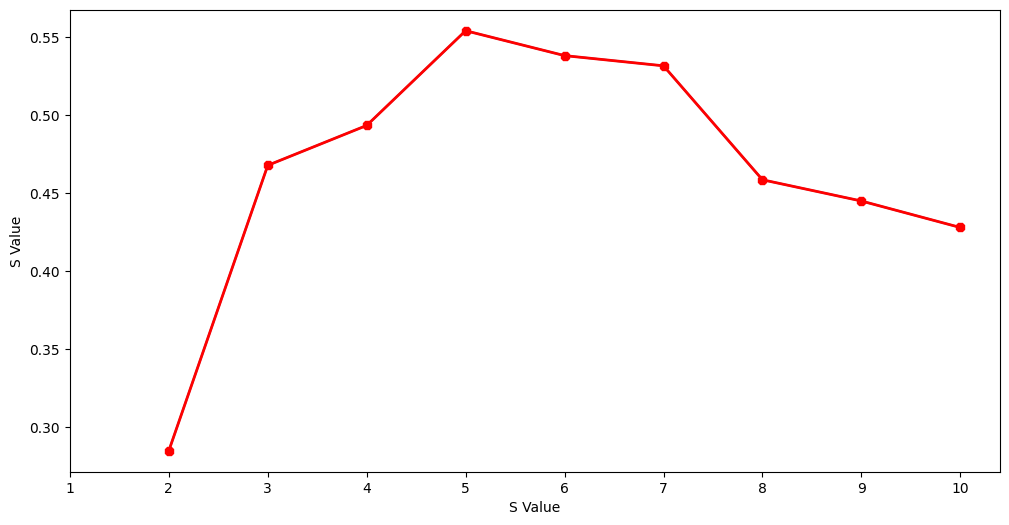

In [ ]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(2,11),s_score) # number of clusters is 2

plt.plot(range(2,11),s_score, linewidth=2, color="red", marker ="8")

plt.xlabel("S Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("S Value")

plt.show()

In [ ]:
## Refactor code to make the code nicer instead of using the for loop
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
### ToDO: Refactor the code
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]


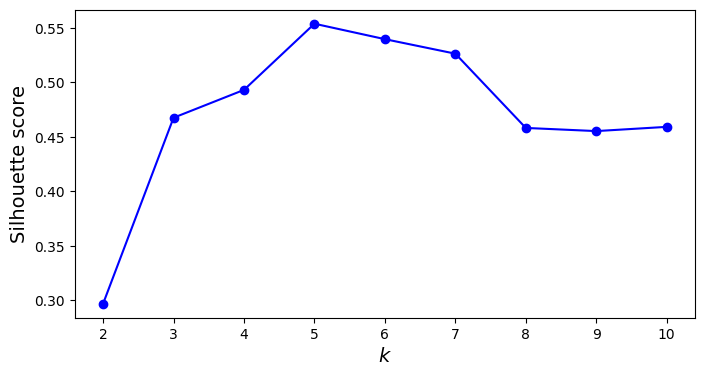

In [ ]:
## Select the best number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_diagram")
plt.show()

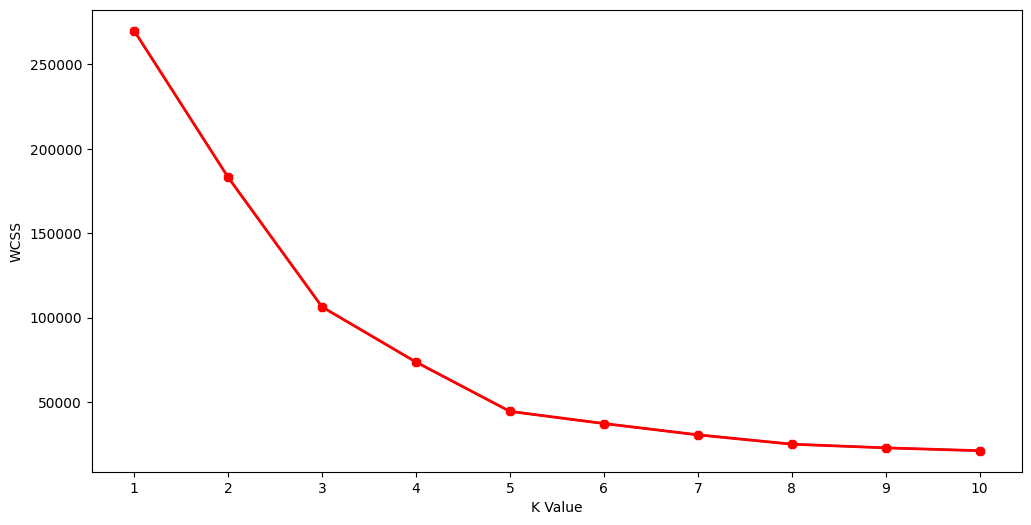

In [ ]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

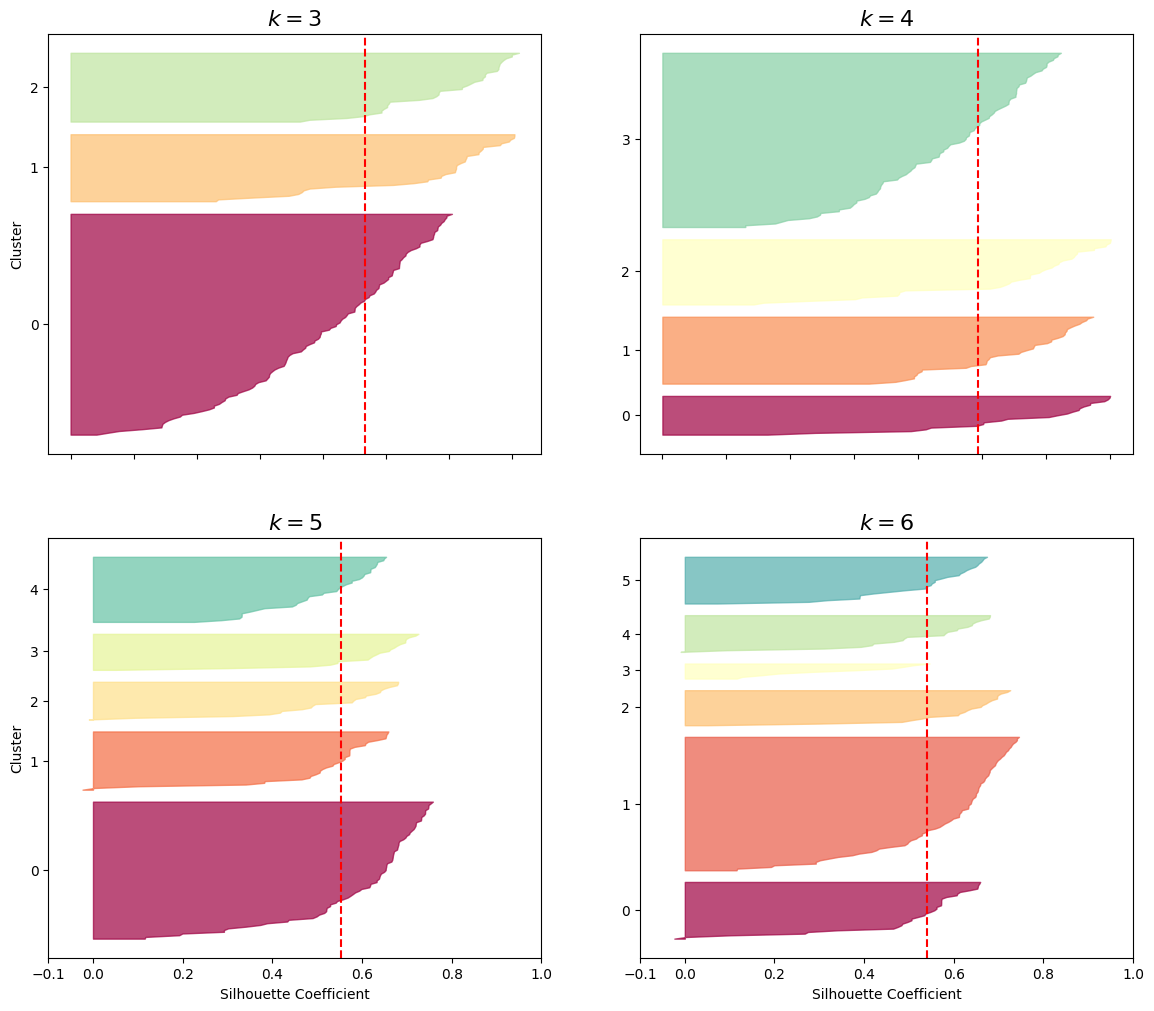

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(14, 12))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
#Taking 5 clusters

km1=KMeans(n_clusters=5)

In [ ]:
#Fitting the input data using km1

km1.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
#predicting the labels of the input data
y=km1.predict(X)


In [ ]:
#adding the labels to a column named label
data["label"] = y



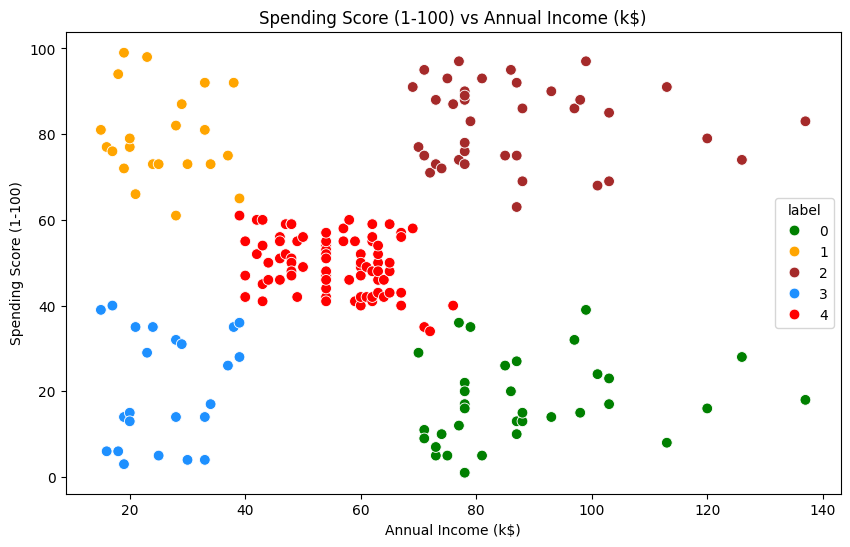

In [ ]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue= 'label' ,
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
cust1=data[data["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=data[data["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=data[data["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=data[data["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=data[data["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 4th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 5th group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  